In [1]:
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import triangle

In [2]:
# redshift sigma g Reff r   i   z     g mag   r mag    i mag  z    w1     w2       w3      w4
lrgs = np.loadtxt(os.path.expandvars('$OM10_DIR/data/LRGo.txt'))
#redshift       g    r    i    z     w1      w2       w3     w4
qsos = np.loadtxt(os.path.expandvars('$OM10_DIR/data/QSOo.txt'))
qsos = qsos[np.logical_and(qsos[:,3]>0,qsos[:,1]>0)] #require g and i band > 0 to kill -10,000 outliers

In [3]:
#db = om10.DB(catalog='$OM10_DIR/notebooks/painted_positioned_catalog.fits')
db = om10.DB(catalog='$OM10_DIR/notebooks/matched_painted_redshift_alone.fits')
matched = db.lenses[np.logical_and(db.lenses['SDSS_FLAG_SRC'] == 0,db.lenses['SDSS_FLAG_LENS'] == 0)]

In [4]:
print len(matched)/len(db.lenses)

0.679908034232


With 2-param matching, we have 6.8% successfully painted

##Comparing SDSS/OM10 Lenses/quasars

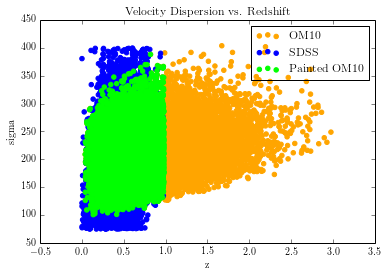

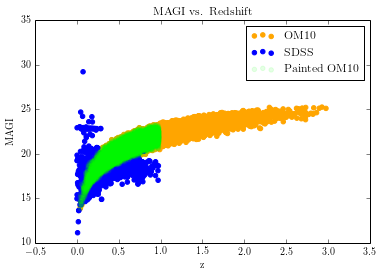

In [5]:
plt.figure()
plt.scatter(db.lenses['ZLENS'],db.lenses['VELDISP'],color='Orange',label='OM10')
plt.scatter(lrgs[:,0],lrgs[:,1],color='Blue',label='SDSS')
plt.scatter(matched['ZLENS'],matched['VELDISP'],color='Lime',label='Painted OM10')
plt.title('Velocity Dispersion vs. Redshift')
plt.xlabel('z')
plt.ylabel('sigma')
plt.legend()

plt.figure()
plt.scatter(db.lenses['ZLENS'],db.lenses['APMAG_I'],color='Orange',label='OM10')
plt.scatter(lrgs[:,0],lrgs[:,9],color='Blue',label='SDSS')
plt.scatter(matched['ZLENS'],matched['APMAG_I'],color='Lime',label='Painted OM10',alpha=.1)
plt.title('MAGI vs. Redshift')
plt.xlabel('z')
plt.ylabel('MAGI')
plt.legend()

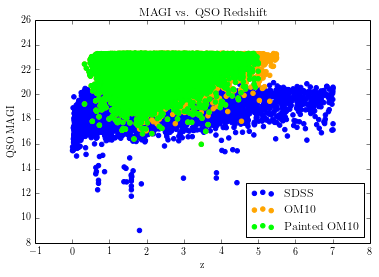

In [6]:
plt.figure()
plt.scatter(qsos[:,0],qsos[:,3],color='Blue',label='SDSS')
plt.scatter(db.lenses['ZSRC'],db.lenses['MAGI'],color='Orange',label='OM10')
plt.scatter(matched['ZSRC'],matched['MAGI'],color='Lime',label='Painted OM10')
plt.title('MAGI vs. QSO Redshift')
plt.xlabel('z')
plt.ylabel('QSO MAGI')
plt.legend(loc=4)

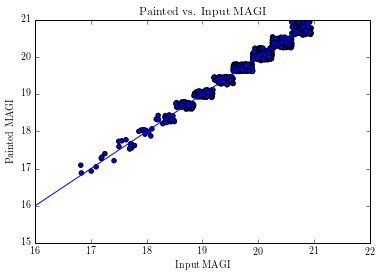

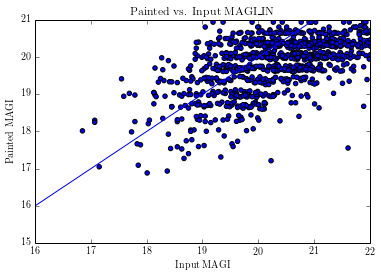

In [58]:
plt.scatter(matched['MAGI'],matched['MAGI_SRC'])
plt.plot(np.arange(15,23),np.arange(15,23))
plt.xlim(16,22)
plt.ylim(15,21)
plt.title('Painted vs. Input MAGI')
plt.xlabel('Input MAGI')
plt.ylabel('Painted MAGI')

plt.figure()
plt.scatter(matched['MAGI_IN'],matched['MAGI_SRC'])
plt.plot(np.arange(15,23),np.arange(15,23))
plt.xlim(16,22)
plt.ylim(15,21)
plt.title('Painted vs. Input MAGI\_IN')
plt.xlabel('Input MAGI')
plt.ylabel('Painted MAGI')

binned strucure in SDSS painted QSO magnitudes

##Extrapolating from SDSS to higher redshift?

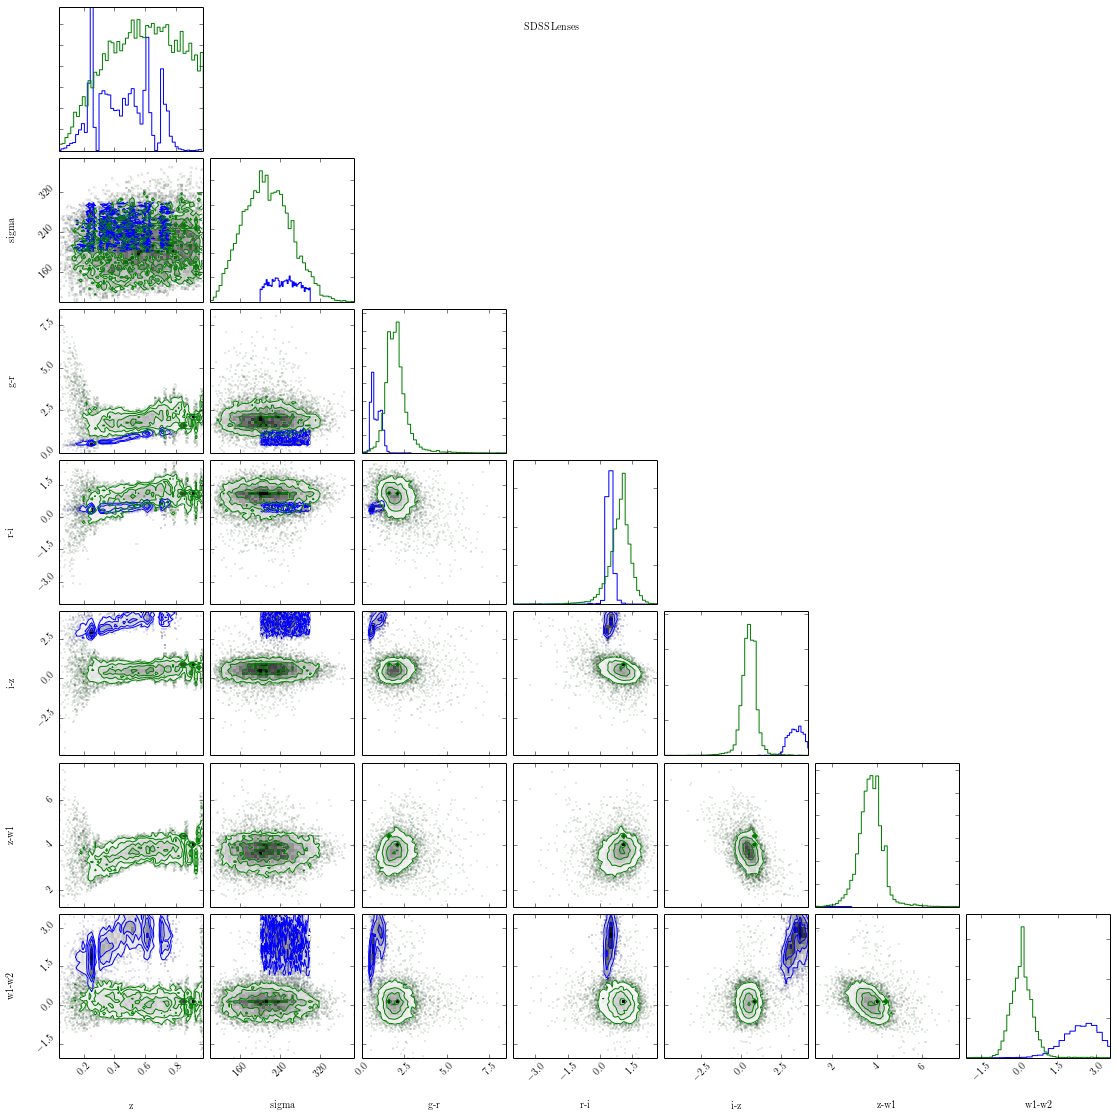

In [13]:
lrgs = lrgs[np.logical_and(np.logical_and(lrgs[:,8]<24,lrgs[:,9]<22),np.abs(lrgs[:,1]-250)<50)]
to_plot = np.array([lrgs[:,0], lrgs[:,1], lrgs[:,7]-lrgs[:,8], lrgs[:,8]-lrgs[:,9],\
                    lrgs[:,9]-lrgs[:,10], lrgs[:,10]-lrgs[:,11], lrgs[:,11]-lrgs[:,12]]).transpose()
painted_lenses = np.array([matched['ZLENS'],matched['VELDISP'],matched['MAGG_LENS']-matched['MAGR_LENS'], \
                    matched['MAGR_LENS']-matched['MAGI_LENS'],matched['MAGI_LENS']-matched['MAGZ_LENS'], \
                    matched['MAGZ_LENS']-matched['MAGW1_LENS'],matched['MAGW1_LENS']-matched['MAGW2_LENS']]).transpose()
fig = triangle.corner(to_plot,labels=['z','sigma','g-r','r-i','i-z','z-w1','w1-w2'],color='Blue')
_ = triangle.corner(painted_lenses,labels=['z','sigma','g-r','r-i','i-z','z-w1','w1-w2'],color='Green',fig=fig)
plt.suptitle('SDSS Lenses')

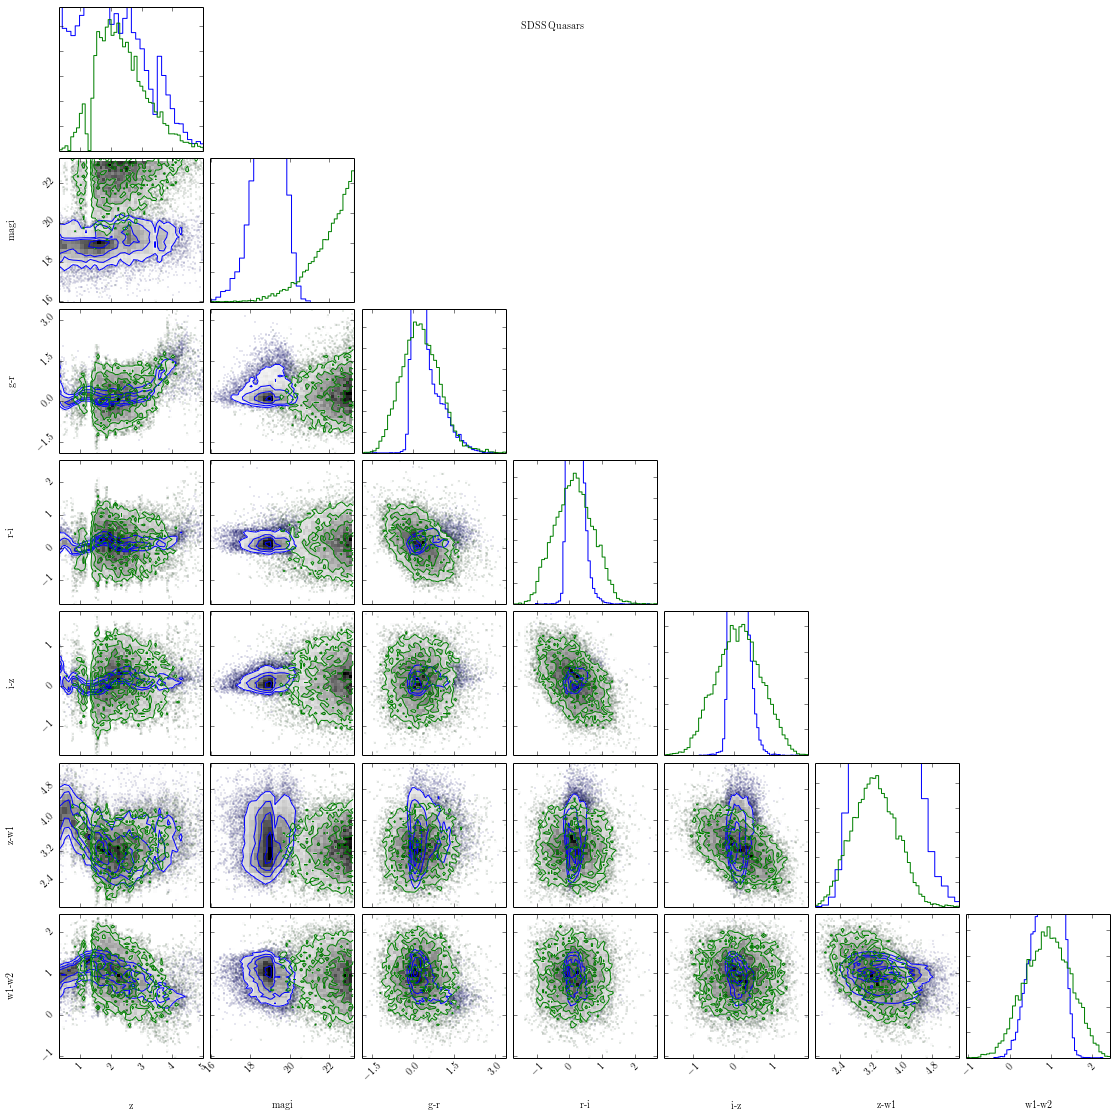

In [31]:
#Get rid of failures in z=~1.25 bin
matched = matched[np.logical_and(matched['MAGG_SRC']<35,matched['MAGG_SRC']>0)]
matched = matched[np.logical_and(matched['MAGR_SRC']<35,matched['MAGR_SRC']>0)]
matched = matched[np.logical_and(matched['MAGI_SRC']<35,matched['MAGI_SRC']>0)]
matched = matched[np.logical_and(matched['MAGZ_SRC']<35,matched['MAGZ_SRC']>0)]
matched = matched[np.logical_and(matched['MAGW1_SRC']<35,matched['MAGW1_SRC']>0)]
matched = matched[np.logical_and(matched['MAGW2_SRC']<35,matched['MAGW2_SRC']>0)]

to_plot = np.array([qsos[:,0], qsos[:,3], qsos[:,1]-qsos[:,2], qsos[:,2]-qsos[:,3], qsos[:,3]-qsos[:,4],\
                   qsos[:,4]-qsos[:,5],qsos[:,5]-qsos[:,6]]).transpose()
painted_qsos = np.array([matched['ZSRC'],matched['MAGI'],matched['MAGG_SRC']-matched['MAGR_SRC'], \
                    matched['MAGR_SRC']-matched['MAGI_SRC'],matched['MAGI_SRC']-matched['MAGZ_SRC'], \
                    matched['MAGZ_SRC']-matched['MAGW1_SRC'],matched['MAGW1_SRC']-matched['MAGW2_SRC']]).transpose()
fig = triangle.corner(to_plot,labels=['z','magi','g-r','r-i','i-z','z-w1','w1-w2'],color='Blue')
_ = triangle.corner(painted_qsos,labels=['z','magi','g-r','r-i','i-z','z-w1','w1-w2'],color='Green',fig=fig)
plt.suptitle('SDSS Quasars')

##Let's get rid of these outliers (photometry failures?)

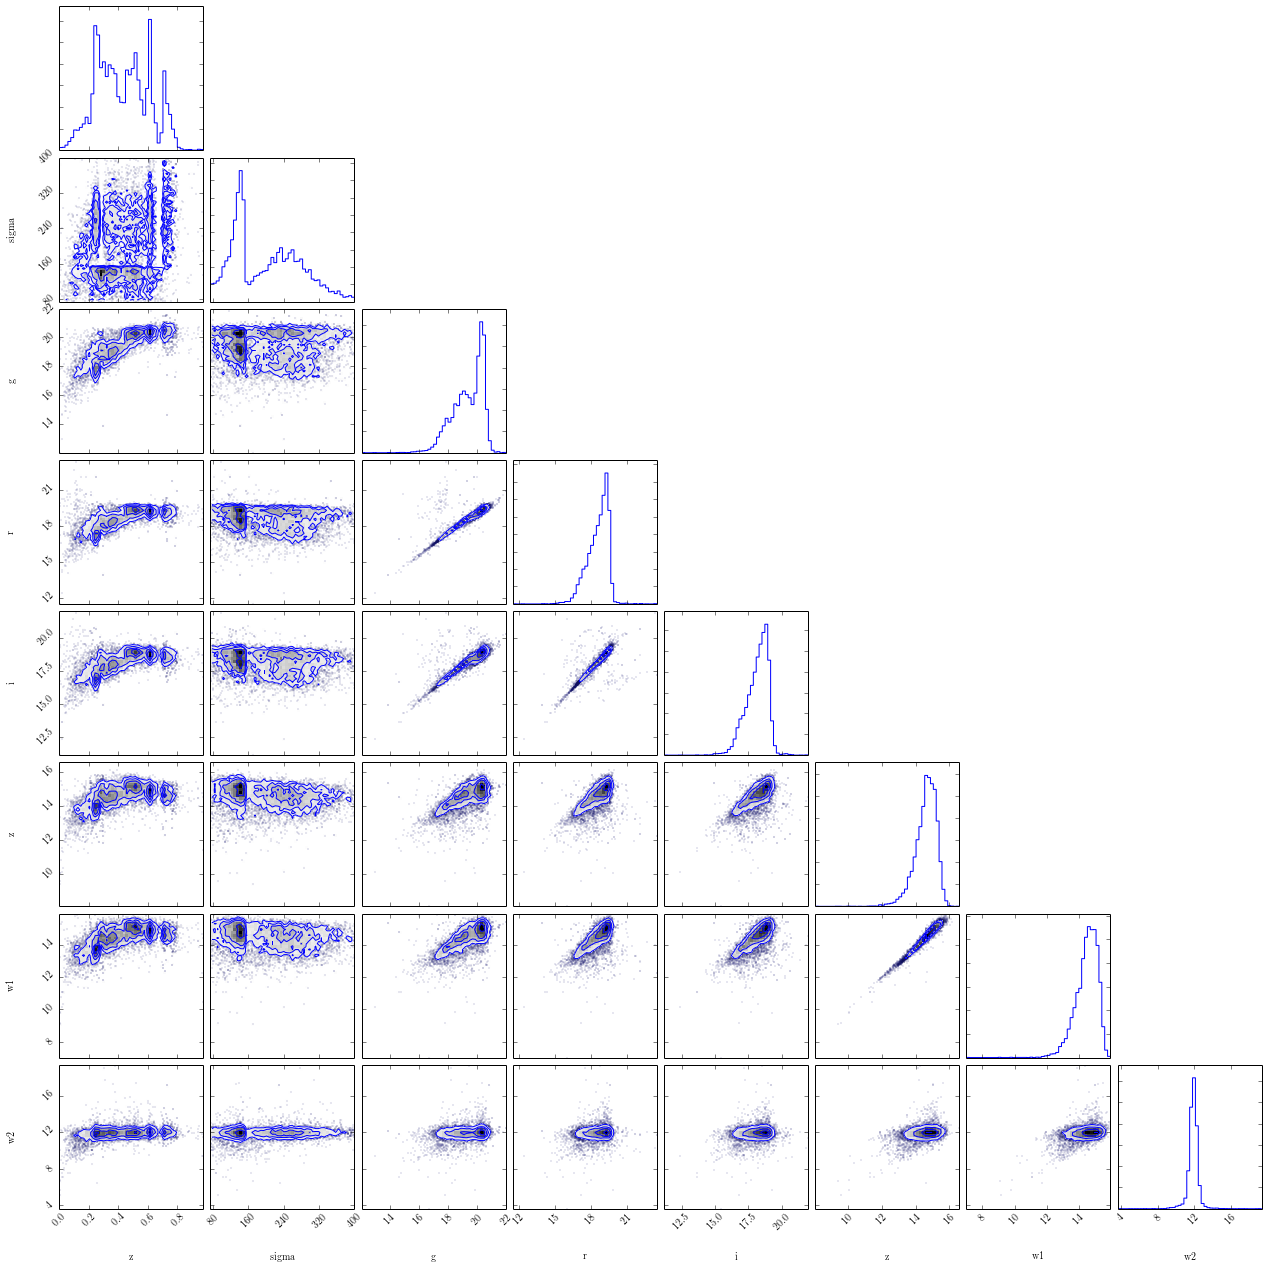

In [64]:
lrgs = lrgs[np.logical_and(lrgs[:,8]<24,lrgs[:,9]<22)]
to_plot = np.array([lrgs[:,0], lrgs[:,1], lrgs[:,7], lrgs[:,8],\
                    lrgs[:,9], lrgs[:,10], lrgs[:,11], lrgs[:,12]]).transpose()
_ = triangle.corner(to_plot,labels=['z','sigma','g','r','i','z','w1','w2'],color='Blue')

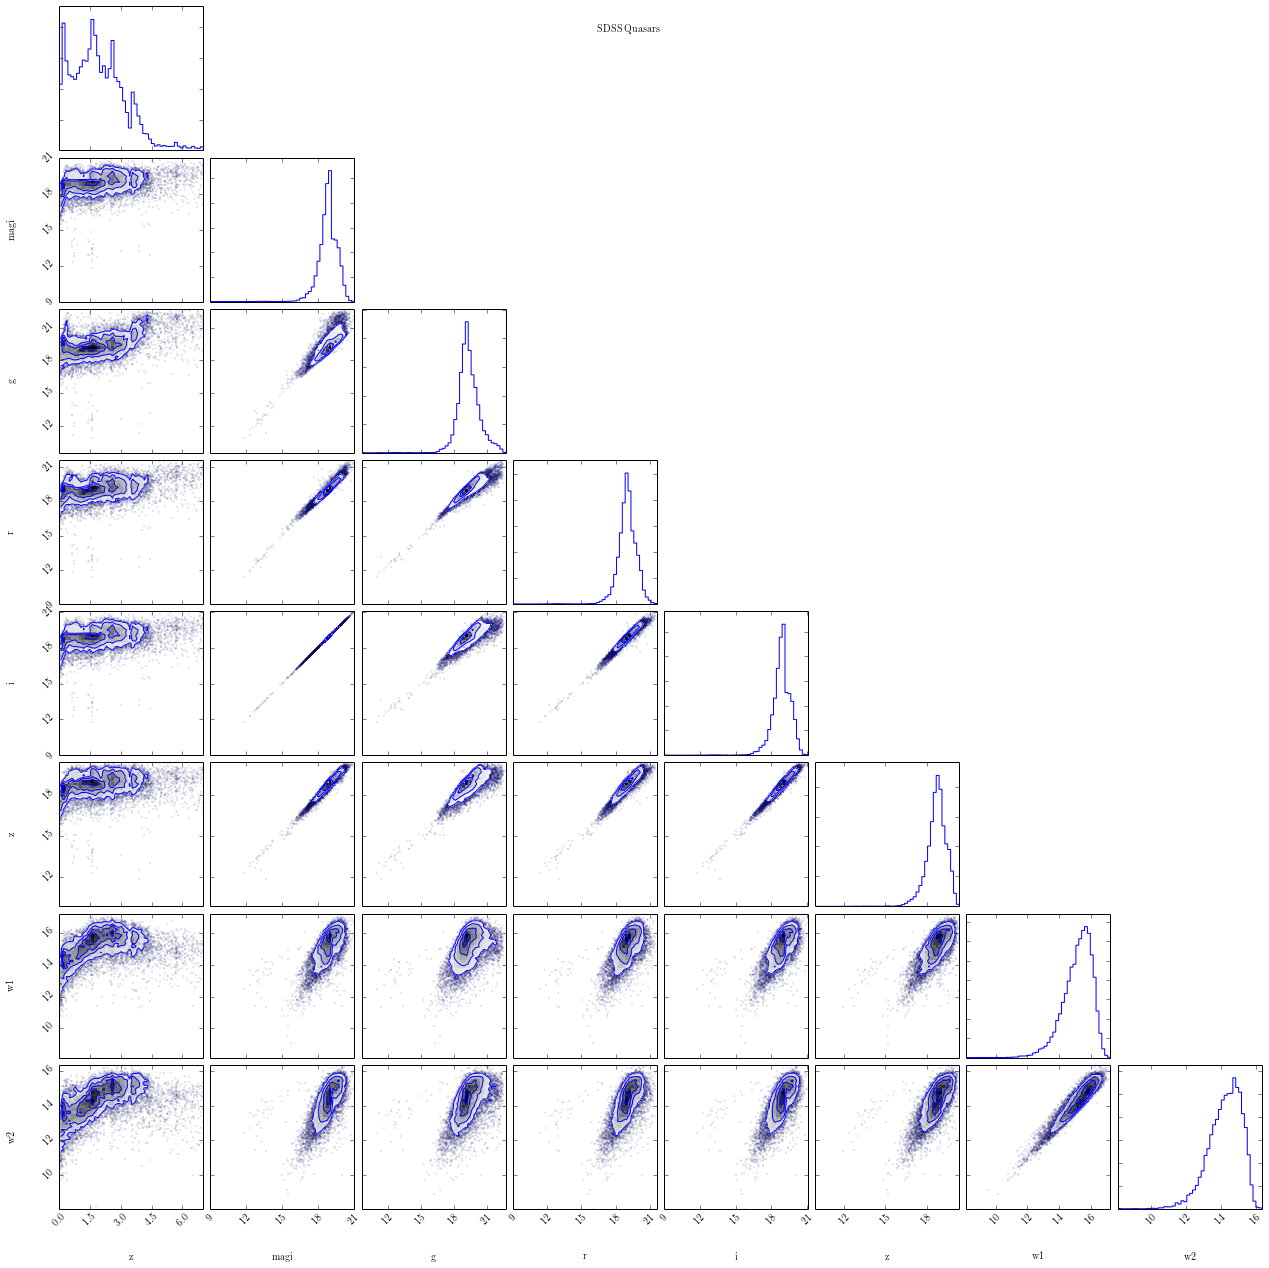

In [56]:
qsos = qsos[np.logical_and(qsos[:,3]>0,qsos[:,1]>0)]
to_plot = np.array([qsos[:,0], qsos[:,3], qsos[:,1], qsos[:,2], qsos[:,3],\
                   qsos[:,4],qsos[:,5], qsos[:,6]]).transpose()
_ = triangle.corner(to_plot,labels=['z','magi','g','r','i','z','w1','w2'],color='Blue')
plt.suptitle('SDSS Quasars')

In [18]:
print matched['ZSRC','MAGI' ,'MAGR_SRC','MAGI_SRC','SDSS_FLAG_SRC']

ZSRC   MAGI      MAGR_SRC      MAGI_SRC   SDSS_FLAG_SRC
---- -------- ------------- ------------- -------------
4.01 22.94768 18.6885134296 18.8445178552           0.0
1.19 23.27365 18.5586249879 18.6916680986           0.0
4.01 21.93714 19.7064486508 19.2204883615           0.0
1.89 21.40345 18.6311424741 18.7573001009           0.0
3.08  20.8123 18.9561025475 19.3561635053           0.0
1.61 18.43945 19.7469161182 19.1001485604           0.0
1.06 23.11888 19.0221891876  19.278019434           0.0
2.08 21.87704 19.0837513659  18.631274556           0.0
2.23 22.45241 19.4248514396 19.3798205952           0.0
1.84 21.32645 19.4588096096 18.3088267951           0.0
1.26 20.52811 326.213981795 159.458405974           0.0
 ...      ...           ...           ...           ...
2.66 22.97344 19.0883706527 18.9131784744           0.0
3.46 23.11414 19.5726159301 18.8437600682           0.0
3.23 23.29621  19.172576786 18.8959612848           0.0
4.09 22.74672 19.6020915884 19.7173783109       

In [25]:
matched = matched[np.logical_and(matched['MAGR_SRC']<35,matched['MAGR_SRC']>0)]
print matched2['ZSRC','MAGI' ,'MAGR_SRC','MAGI_SRC','SDSS_FLAG_SRC']

ZSRC   MAGI      MAGR_SRC      MAGI_SRC   SDSS_FLAG_SRC
---- -------- ------------- ------------- -------------
4.01 22.94768 18.6885134296 18.8445178552           0.0
1.19 23.27365 18.5586249879 18.6916680986           0.0
4.01 21.93714 19.7064486508 19.2204883615           0.0
1.89 21.40345 18.6311424741 18.7573001009           0.0
3.08  20.8123 18.9561025475 19.3561635053           0.0
1.61 18.43945 19.7469161182 19.1001485604           0.0
1.06 23.11888 19.0221891876  19.278019434           0.0
2.08 21.87704 19.0837513659  18.631274556           0.0
2.23 22.45241 19.4248514396 19.3798205952           0.0
1.84 21.32645 19.4588096096 18.3088267951           0.0
1.53 22.46155 18.5756212654 18.7379274156           0.0
 ...      ...           ...           ...           ...
2.66 22.97344 19.0883706527 18.9131784744           0.0
3.46 23.11414 19.5726159301 18.8437600682           0.0
3.23 23.29621  19.172576786 18.8959612848           0.0
4.09 22.74672 19.6020915884 19.7173783109       

In [26]:
len(matched2)

9995

In [24]:
len(matched)

10646

In [30]:
matched[100:200]

LENSID,FLAGTYPE,NIMG,ZLENS,...,MAGW3_SRC,MAGW4_SRC,SDSS_FLAG_SRC
3246386,0,2,0.412,...,11.3582250278,8.31508367723,0.0
3300775,0,4,0.414,...,12.0443758976,7.82535042111,0.0
3341818,0,4,0.416,...,11.1639787479,8.42148821309,0.0
3458521,0,4,0.422,...,10.921619405,8.0863574,0.0
3465678,0,2,0.422,...,11.0310549798,8.23209203519,0.0
3472039,0,2,0.422,...,11.5945500807,8.45757081282,0.0
3519461,0,2,0.424,...,11.535087627,8.49959836198,0.0
3552307,0,2,0.426,...,10.6906591275,8.03485512333,0.0
3561742,0,2,0.426,...,10.4229149371,8.48585632972,0.0
3608014,0,4,0.428,...,11.8781723243,8.07870427379,0.0
